In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
data = pd.read_csv('troop_movements.csv')

# Define features (X) and target variable (y)
X = data[['homeworld', 'unit_type']]  # Features: Gender, Age, City_Location
y = data['empire_or_resistance']  # Target variable

# Define preprocessing steps (OneHotEncoder for categorical features, StandardScaler for numerical features)
categorical_features = ['homeworld', 'unit_type']
X_encoded = pd.get_dummies(X, columns=categorical_features)

# Initialize logistic regression classifier within a pipeline
clf = DecisionTreeClassifier()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the classifier
clf = clf.fit(X_train, y_train)

In [30]:
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.665


In [31]:
import pickle

# Specify the file path to save the pipeline
file_path = 'trained_model.pkl'

# Save the pipeline to disk
with open(file_path, 'wb') as file:
    pickle.dump(clf, file)

In [32]:
# get importances
importances = clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})

In [33]:
feature_importances

,Feature,Importance
0,homeworld_Alderaan,0.052258
1,homeworld_Aleen Minor,0.006163
2,homeworld_Bestine IV,0.007463
3,homeworld_Cerea,0.010360
4,homeworld_Champala,0.006781
5,homeworld_Chandrila,0.014877
6,homeworld_Concord Dawn,0.005248
7,homeworld_Corellia,0.033227
8,homeworld_Dagobah,0.007517
9,homeworld_Dathomir,0.011862


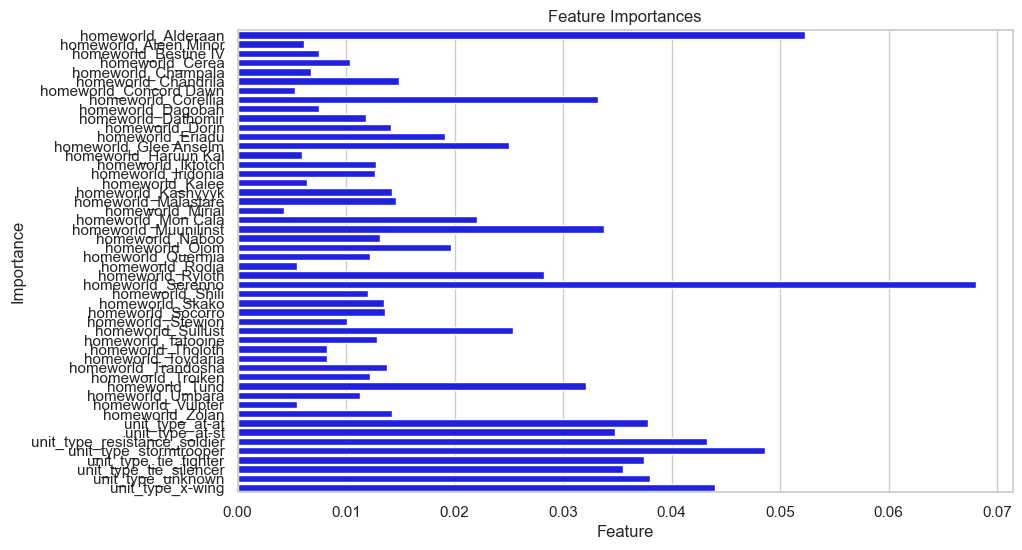

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], color='blue', orient="y")
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()